In [1]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 7A67-75B7

 Directory of C:\Users\User\Desktop\Haaris\Trade Journal\Research\fxboys

09/16/2018  12:41 AM    <DIR>          .
09/16/2018  12:41 AM    <DIR>          ..
09/15/2018  04:24 PM                39 .gitignore
09/15/2018  09:20 PM    <DIR>          .ipynb_checkpoints
09/15/2018  04:27 PM    <DIR>          data
09/15/2018  11:18 PM            71,720 FOREX Attempt1.ipynb
09/16/2018  12:41 AM            25,996 Moving Average Optimization.ipynb
09/15/2018  04:24 PM                10 README.md
               4 File(s)         97,765 bytes
               4 Dir(s)  15,995,416,576 bytes free


In [2]:
!dir data

 Volume in drive C is Windows
 Volume Serial Number is 7A67-75B7

 Directory of C:\Users\User\Desktop\Haaris\Trade Journal\Research\fxboys\data

09/15/2018  04:27 PM    <DIR>          .
09/15/2018  04:27 PM    <DIR>          ..
09/15/2018  04:27 PM           116,197 DEXBZUS.csv
09/15/2018  04:27 PM           233,952 DEXCAUS.csv
09/15/2018  04:27 PM           184,596 DEXCHUS.csv
09/15/2018  04:27 PM           234,285 DEXDNUS.csv
09/15/2018  04:27 PM           184,896 DEXHKUS.csv
09/15/2018  04:27 PM           232,957 DEXINUS.csv
09/15/2018  04:27 PM           232,378 DEXJPUS.csv
09/15/2018  04:27 PM           187,964 DEXKOUS.csv
09/15/2018  04:27 PM           233,812 DEXMAUS.csv
09/15/2018  04:27 PM           125,895 DEXMXUS.csv
09/15/2018  04:27 PM           233,917 DEXNOUS.csv
09/15/2018  04:27 PM           234,242 DEXSDUS.csv
09/15/2018  04:27 PM           193,276 DEXSFUS.csv
09/15/2018  04:27 PM           184,891 DEXSIUS.csv
09/15/2018  04:27 PM           235,669 DEXSLUS.csv
09/15/2

In [3]:
baseDir = 'data/'

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def readDEX(filepath):
    rawData = pd.read_csv(filepath).replace('.', np.nan).fillna(method='ffill')
    # TODO : Parse dates
    rawData.VALUE = rawData.VALUE.astype(float)
    return rawData

In [7]:
# Read csv, remove invalid data
usdcad = readDEX(baseDir + 'DEXCAUS.csv')
nzdusd = readDEX(baseDir + 'DEXUSNZ.csv')

In [24]:
def MAstrat(myVar,ShortMA,LongMA):
    XR = readDEX(baseDir + 'DEX' + myVar + '.csv')
    XR['ShortMA'] = XR.VALUE.rolling(window=ShortMA).mean()
    XR['LongMA'] = XR.VALUE.rolling(window=LongMA).mean()
    
    XR['Differential'] = XR['ShortMA'] - XR['LongMA']
    
    X = 0
    XR['Stance'] = np.where(XR['Differential'] > X, 1, 0)
    XR['Stance'] = np.where(XR['Differential'] < X, -1, XR['Stance'])
    XR['Stance'].value_counts()
    
    XR['Returns'] = XR.VALUE.pct_change()[1:]
    XR['Strategy'] = XR['Returns'] * XR['Stance'].shift(1)
    
    return (XR['Strategy'].cumsum()[12434])

In [25]:
ShortMA = np.linspace(10,100,19,dtype=int)
LongMA = np.linspace(110,200,19,dtype=int)

results_pnl = np.zeros((len(ShortMA),len(LongMA)))

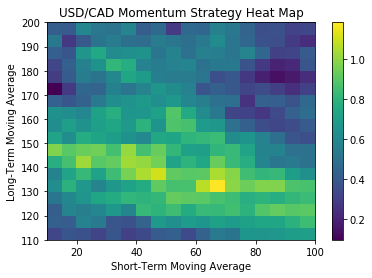

In [26]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('CAUS',sma,lma)
        results_pnl[i,j] = pnl

plt.title("USD/CAD Momentum Strategy Heat Map")
plt.ylabel("Long-Term Moving Average")
plt.xlabel("Short-Term Moving Average")
plt.pcolor(ShortMA,LongMA,results_pnl)
plt.colorbar()
plt.show()

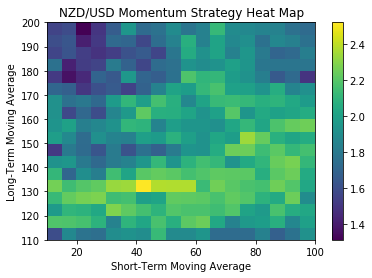

In [27]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('USNZ',sma,lma)
        results_pnl[i,j] = pnl

plt.title("NZD/USD Momentum Strategy Heat Map")
plt.ylabel("Long-Term Moving Average")
plt.xlabel("Short-Term Moving Average")
plt.pcolor(ShortMA,LongMA,results_pnl)
plt.colorbar()
plt.show()

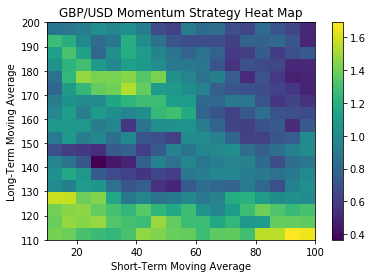

In [28]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('USUK',sma,lma)
        results_pnl[i,j] = pnl

plt.title("GBP/USD Momentum Strategy Heat Map")
plt.ylabel("Long-Term Moving Average")
plt.xlabel("Short-Term Moving Average")
plt.pcolor(ShortMA,LongMA,results_pnl)
plt.colorbar()
plt.show()

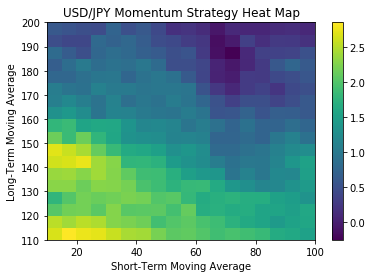

In [29]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('JPUS',sma,lma)
        results_pnl[i,j] = pnl

plt.title("USD/JPY Momentum Strategy Heat Map")
plt.ylabel("Long-Term Moving Average")
plt.xlabel("Short-Term Moving Average")
plt.pcolor(ShortMA,LongMA,results_pnl)
plt.colorbar()
plt.show()